### Generative Adversarial Networks: A toy example

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's start with a simple distribution from which to draw our "real" data from.

$$x \sim \mathcal{N} \left( [1,1],\begin{bmatrix}
    1       & 0.8  \\
    0.8       & 1
\end{bmatrix} \right)$$

In [101]:
def sim_real_data(n=10000):
    mu = np.array([1,1])
    sigma = np.array([[1,0.8],[0.8,1]])
    return np.random.multivariate_normal(mu,sigma,n)

training_data = sim_real_data()
plt.plot(training_data[:,0],training_data[:,1],'.',alpha=0.1)
plt.title('"Real Data"');

Next, we'll create our generator and discriminator networks using tensorflow. Each will be a three layer, fully connected network with relu's in the hidden layers.

In [102]:
import tensorflow as tf

num_labels = 2
num_relu = 64
graph = tf.Graph()
n_vars = 2

with graph.as_default():

    ##### Training Data #####
    input_dataset = tf.placeholder(tf.float32,
                            shape=(None, n_vars))
    
    ######################
    ##### Generative #####
    ######################
    input_rands = tf.placeholder(tf.float32,
                                    shape=(None, n_vars))
  
    # Generative Variables.
    weights = tf.Variable(
        tf.truncated_normal([n_vars, num_relu]))
    biases = tf.Variable(tf.zeros([num_relu]))
    weights2 = tf.Variable(
        tf.truncated_normal([num_relu, num_relu]))
    biases2 = tf.Variable(tf.zeros([num_relu]))
    weights3 = tf.Variable(
        tf.truncated_normal([num_relu, num_labels]))
    biases3 = tf.Variable(tf.zeros([num_labels]))
    generative_var_list = [weights,
                          biases,
                          weights2,
                          biases2,
                          weights3,
                          biases3]
  
    # Generative computation.
    logits = tf.matmul(input_rands, weights) + biases
    hidden_layer = tf.nn.relu(logits)
    logits2 = tf.matmul(hidden_layer, weights2) + biases2
    hidden_layer2 = tf.nn.relu(logits2)
    
    generated_data = tf.matmul(hidden_layer2, weights3) + biases3
    
    # Stack the generated data with the input data
    discriminator_input = tf.concat(0, [generated_data, input_dataset])
    labels = tf.placeholder(tf.float32, shape=(None, num_labels))
    
    ##########################
    ##### Discriminative #####
    ##########################
    
    # Discriminative Variables.
    weights_d = tf.Variable(
        tf.truncated_normal([n_vars, num_relu]))
    biases_d = tf.Variable(tf.zeros([num_relu]))
    weights2_d = tf.Variable(
        tf.truncated_normal([num_relu, num_relu]))
    biases2_d = tf.Variable(tf.zeros([num_relu]))
    weights3_d = tf.Variable(
        tf.truncated_normal([num_relu, num_labels]))
    biases3_d = tf.Variable(tf.zeros([num_labels]))
    discriminative_var_list = [weights_d,
                          biases_d,
                          weights2_d,
                          biases2_d,
                          weights3_d,
                          biases3_d]
    
    # Discriminative Network computation.
    logits_d = tf.matmul(discriminator_input, weights_d) + biases_d
    hidden_layer_d = tf.nn.relu(logits_d)
    logits2_d = tf.matmul(hidden_layer_d, weights2_d) + biases2_d
    hidden_layer2_d = tf.nn.tanh(logits2_d)
    logits3_d = tf.matmul(hidden_layer2_d, weights3_d) + biases3_d
    
    discriminative_loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits3_d, labels) +
             0.005 * tf.nn.l2_loss(weights_d) +
             0.005 * tf.nn.l2_loss(weights2_d) +
             0.005 * tf.nn.l2_loss(weights3_d))
  
    # Descriminative Optimizer.
    discriminative_optimizer = tf.train.GradientDescentOptimizer(10e-3).minimize(discriminative_loss,
                                                                                var_list=discriminative_var_list)
  
    # Predictions made by the discriminator.
    prediction = tf.nn.softmax(logits3_d)
    
    # generative_loss 
    generative_loss = - tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits3_d, labels) +
             0.005 * tf.nn.l2_loss(weights) +
             0.005 * tf.nn.l2_loss(weights2) +
             0.005 * tf.nn.l2_loss(weights3))
    
    # Generative Optimizer.
    generative_optimizer = tf.train.GradientDescentOptimizer(10e-3).minimize(generative_loss,
                                                                            var_list=generative_var_list)  

Next, we'll fit each model in turn. Note that we gave each optimizer a list of variables to update via gradient descent. This is because we don't want to update the weights of the discriminator while we're updating the weights of the generator, and _visa versa_.

Initialized
loss at step 0: discriminative: 11.650652, generative: -9.347455


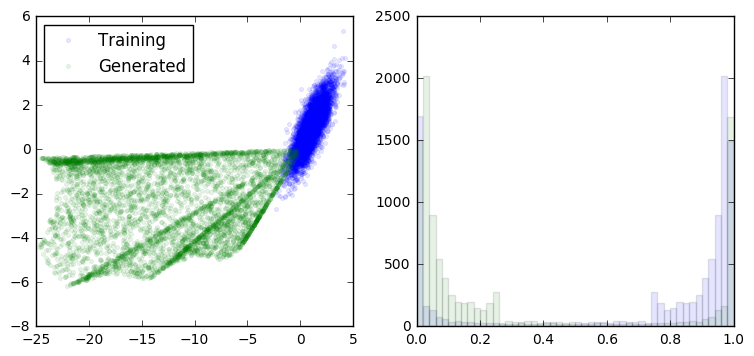

loss at step 200: discriminative: 8.815780, generative: -9.117246


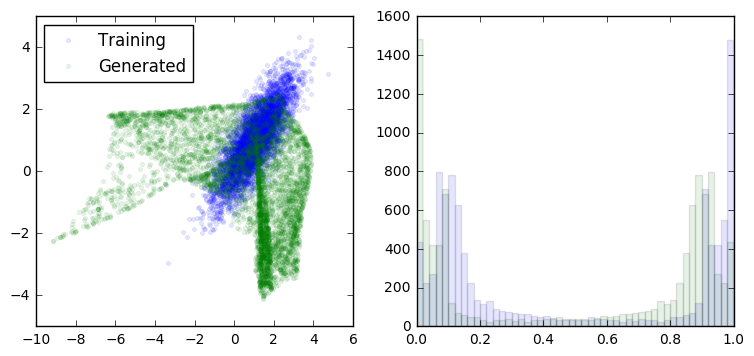

loss at step 400: discriminative: 8.826855, generative: -9.462300


loss at step 600: discriminative: 8.893397, generative: -9.835464


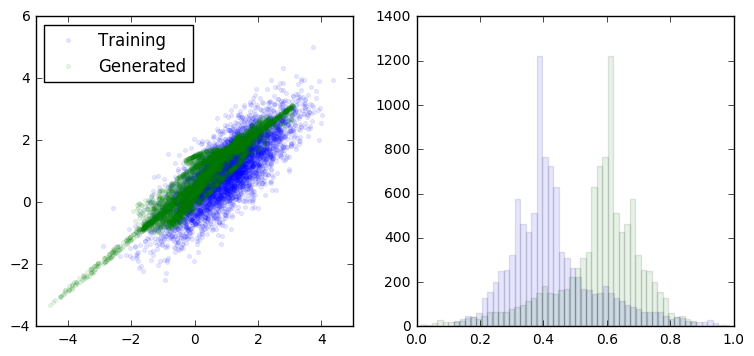

loss at step 800: discriminative: 8.531559, generative: -9.826269


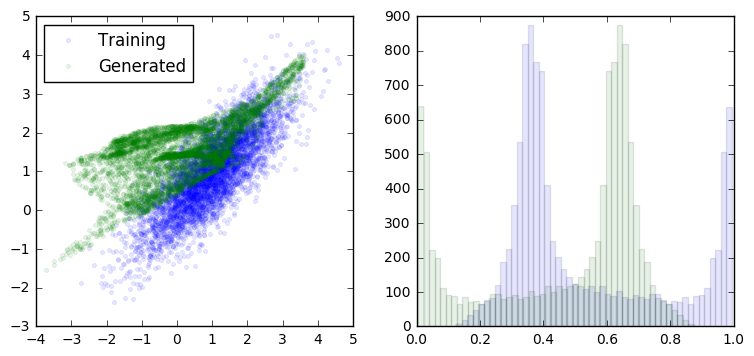

loss at step 1000: discriminative: 8.507895, generative: -10.146571


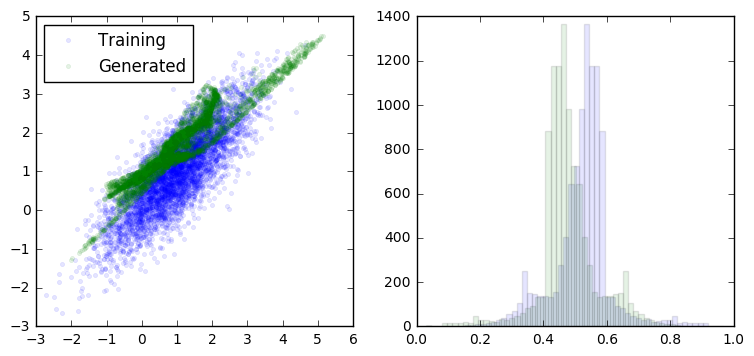

loss at step 1200: discriminative: 8.362288, generative: -10.378010


loss at step 1400: discriminative: 8.217944, generative: -10.583308


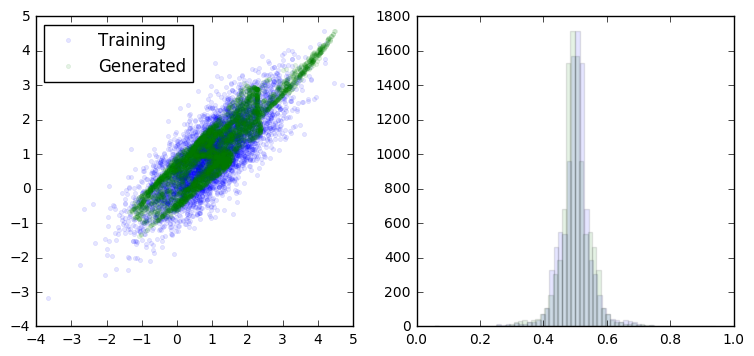

loss at step 1600: discriminative: 8.062150, generative: -10.770627


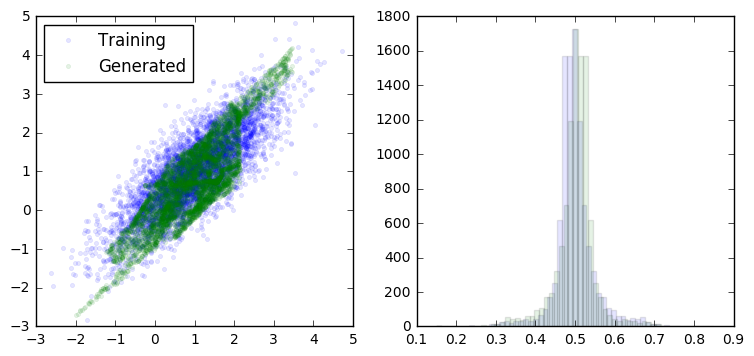

loss at step 1800: discriminative: 7.916959, generative: -10.981360


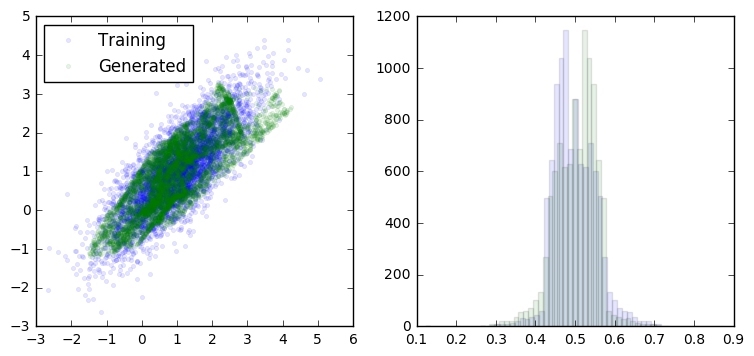

loss at step 2000: discriminative: 7.770545, generative: -11.185527


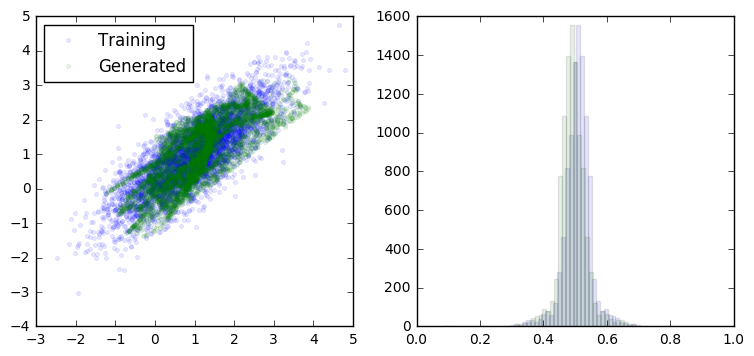

loss at step 2200: discriminative: 7.628145, generative: -11.394085


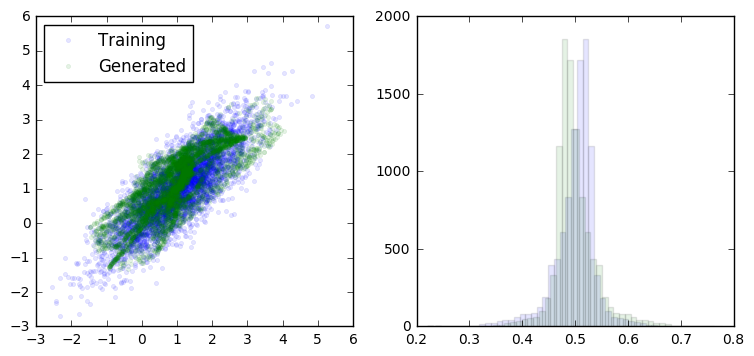

loss at step 2400: discriminative: 7.493383, generative: -11.614177


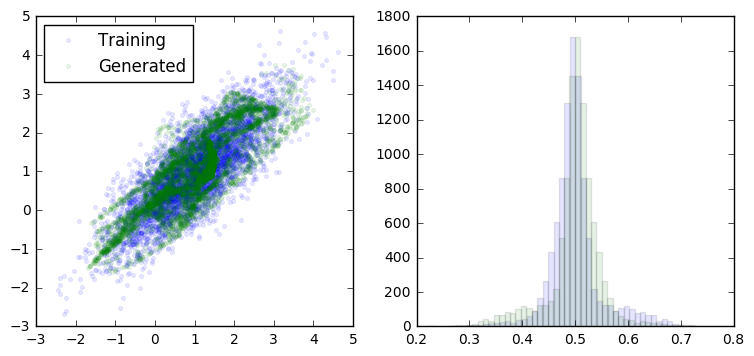

loss at step 2600: discriminative: 7.360614, generative: -11.836347


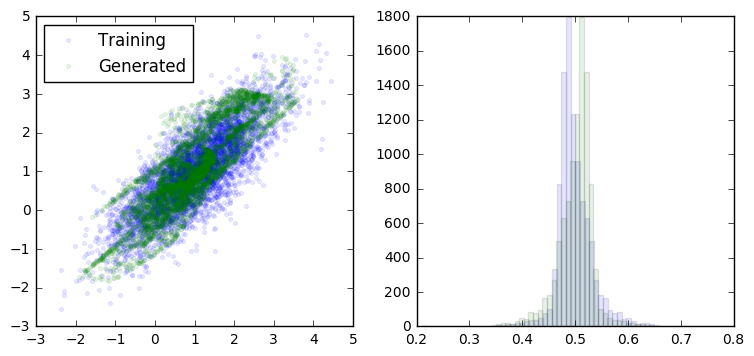

loss at step 2800: discriminative: 7.226531, generative: -12.059964


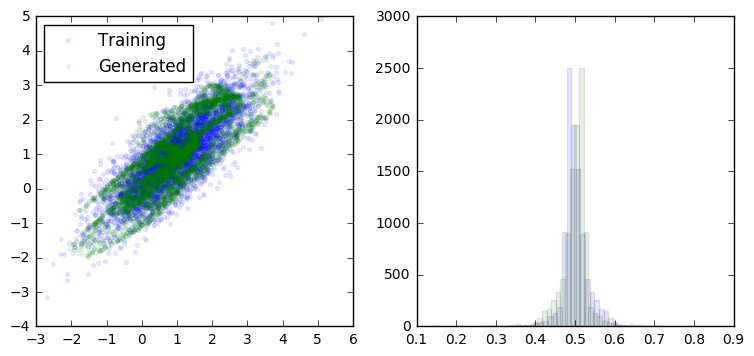

loss at step 3000: discriminative: 7.097442, generative: -12.288472


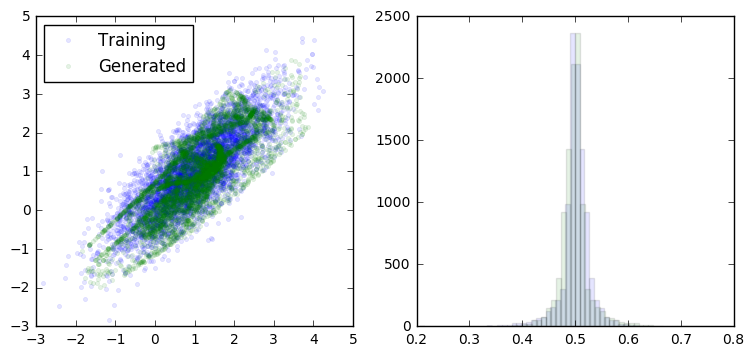

loss at step 3200: discriminative: 6.966605, generative: -12.519504


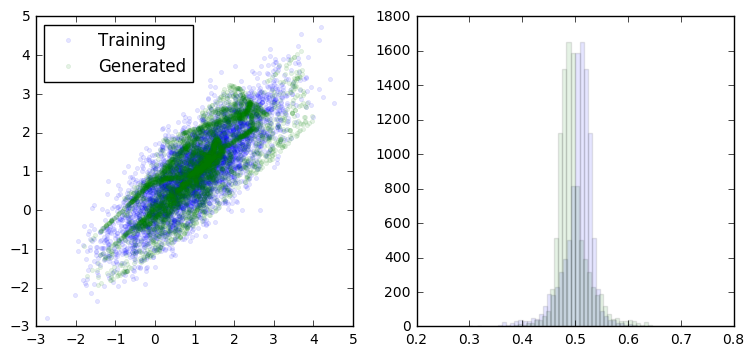

loss at step 3400: discriminative: 6.843911, generative: -12.758694


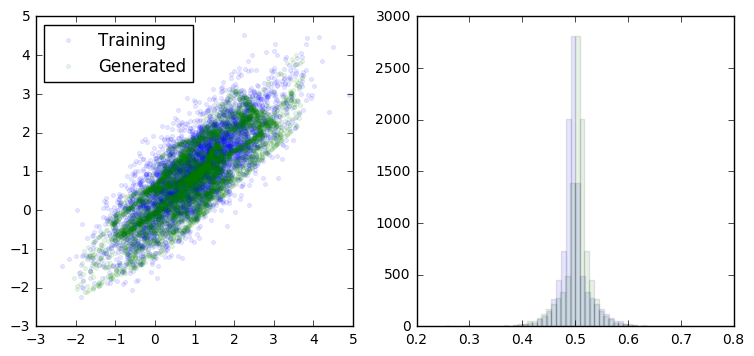

loss at step 3600: discriminative: 6.724183, generative: -13.005814


loss at step 3800: discriminative: 6.604773, generative: -13.253613


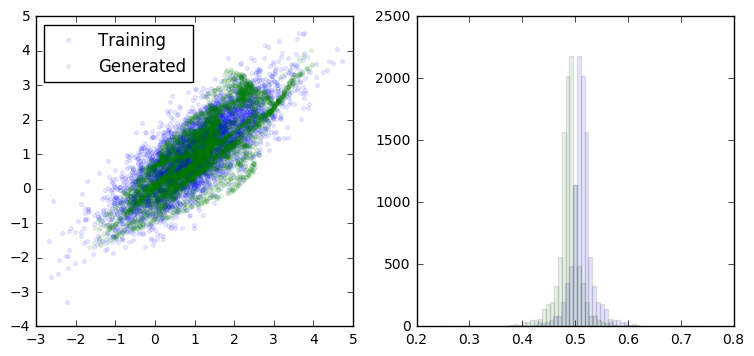

loss at step 4000: discriminative: 6.484357, generative: -13.504487


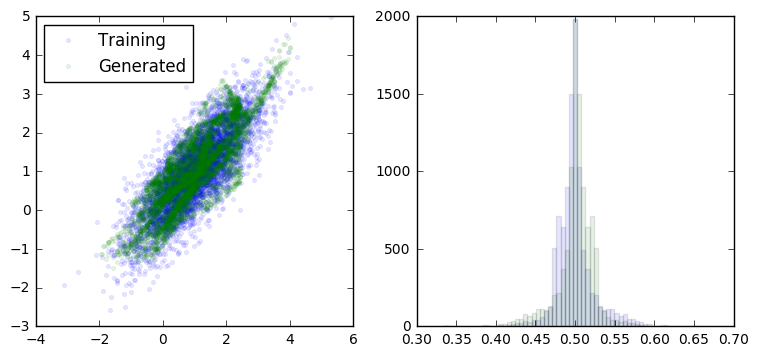

loss at step 4200: discriminative: 6.370577, generative: -13.762425


loss at step 4400: discriminative: 6.256100, generative: -14.026154


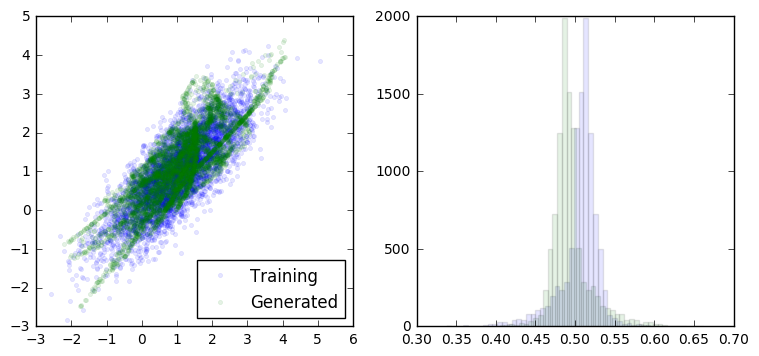

loss at step 4600: discriminative: 6.147427, generative: -14.297275


loss at step 4800: discriminative: 6.038839, generative: -14.571451


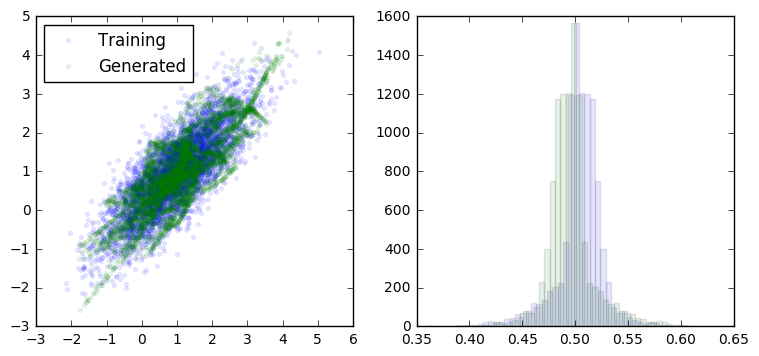

loss at step 5000: discriminative: 5.931309, generative: -14.849357


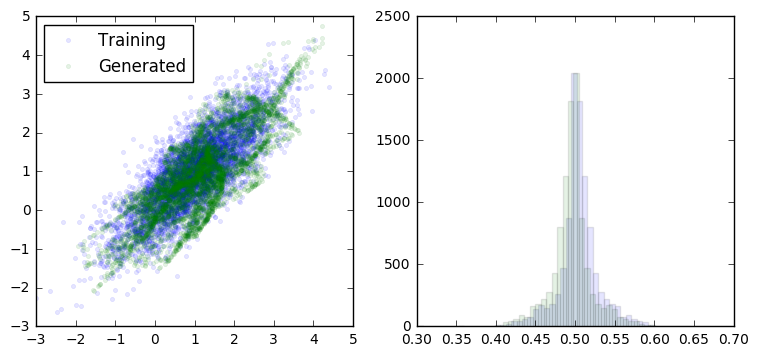

loss at step 5200: discriminative: 5.828815, generative: -15.137408


loss at step 5400: discriminative: 5.727039, generative: -15.429005


loss at step 5600: discriminative: 5.625005, generative: -15.718889


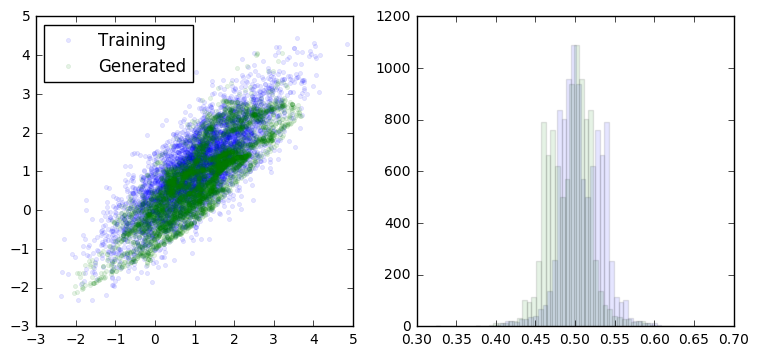

loss at step 5800: discriminative: 5.529792, generative: -16.029690


loss at step 6000: discriminative: 5.434550, generative: -16.339636


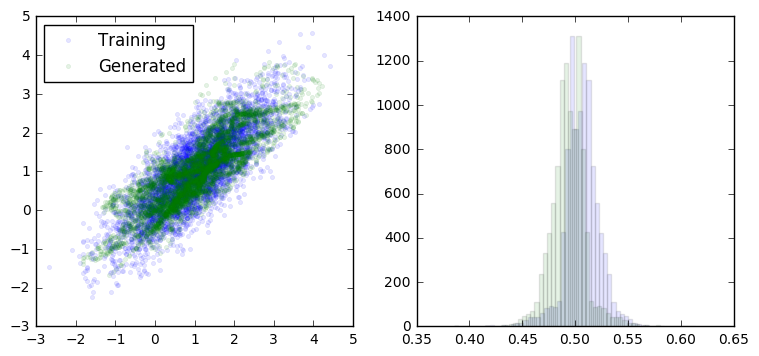

loss at step 6200: discriminative: 5.340966, generative: -16.654139


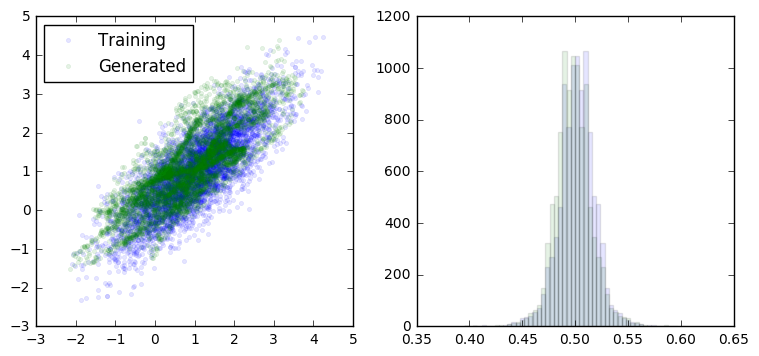

loss at step 6400: discriminative: 5.248607, generative: -16.977909


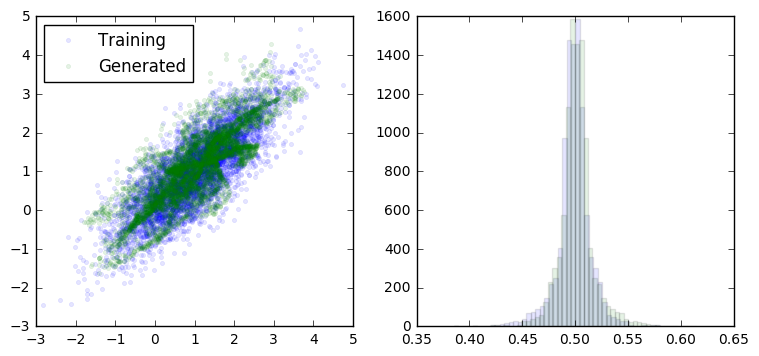

loss at step 6600: discriminative: 5.158027, generative: -17.307005


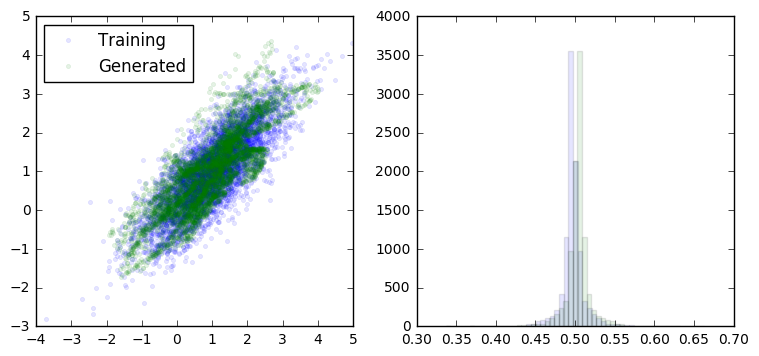

loss at step 6800: discriminative: 5.069788, generative: -17.642750


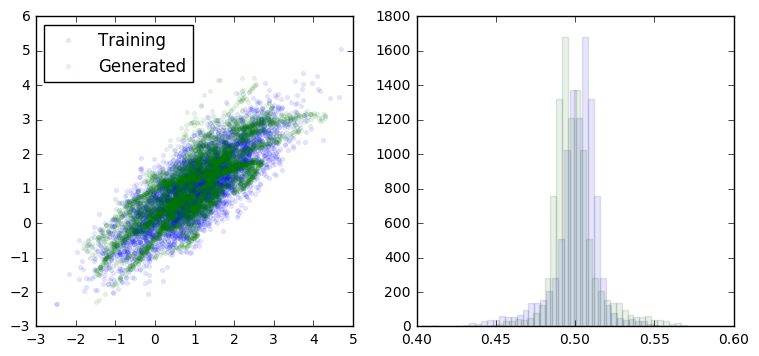

loss at step 7000: discriminative: 4.983613, generative: -17.985369


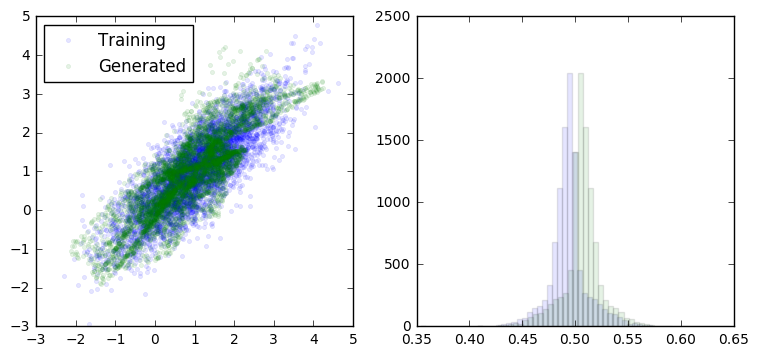

loss at step 7200: discriminative: 4.898520, generative: -18.334929


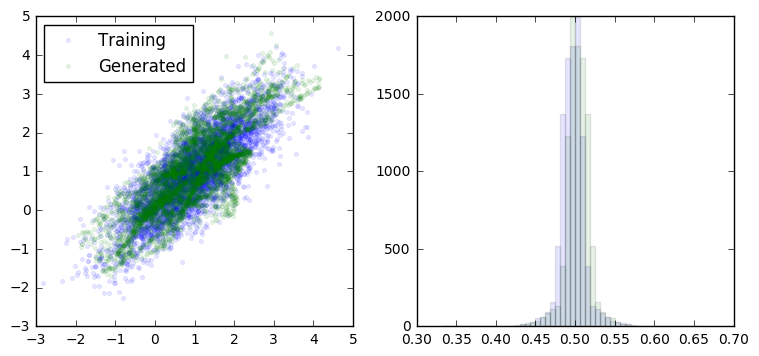

loss at step 7400: discriminative: 4.817279, generative: -18.691185


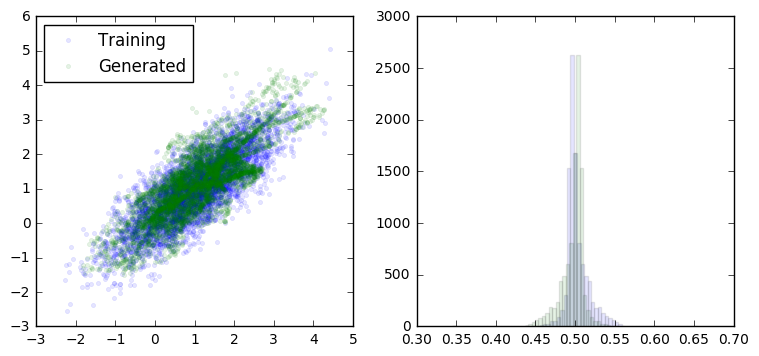

loss at step 7600: discriminative: 4.733655, generative: -19.053772


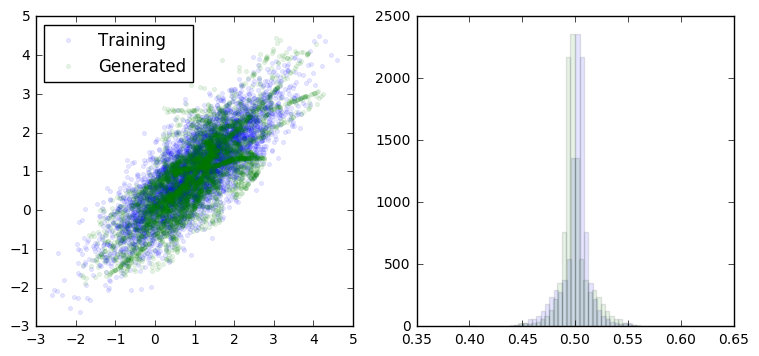

loss at step 7800: discriminative: 4.652752, generative: -19.424475


loss at step 8000: discriminative: 4.574621, generative: -19.802925


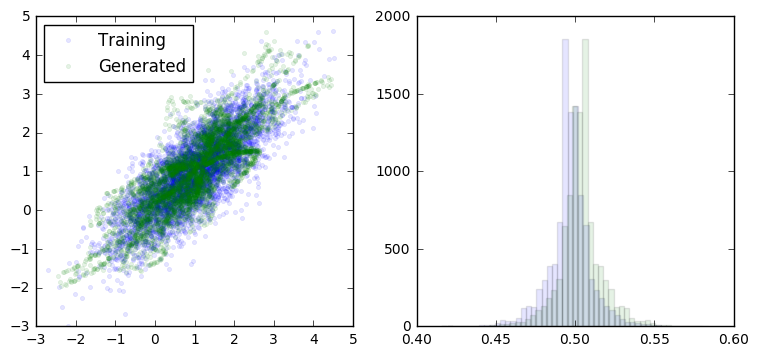

loss at step 8200: discriminative: 4.499351, generative: -20.189707


loss at step 8400: discriminative: 4.422564, generative: -20.582222


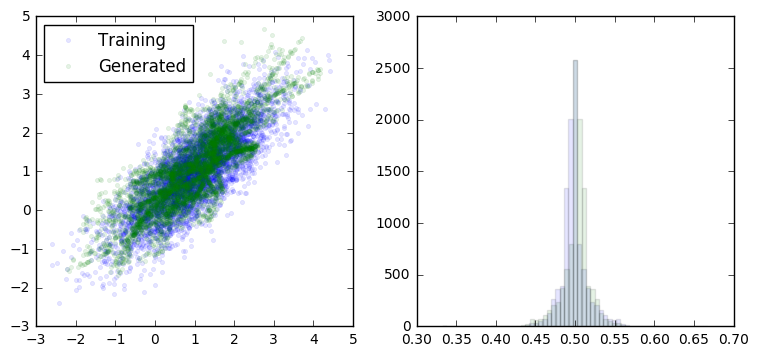

loss at step 8600: discriminative: 4.349679, generative: -20.985027


loss at step 8800: discriminative: 4.276344, generative: -21.393940


loss at step 9000: discriminative: 3.836504, generative: -21.435350


loss at step 9200: discriminative: 3.565572, generative: -21.659182


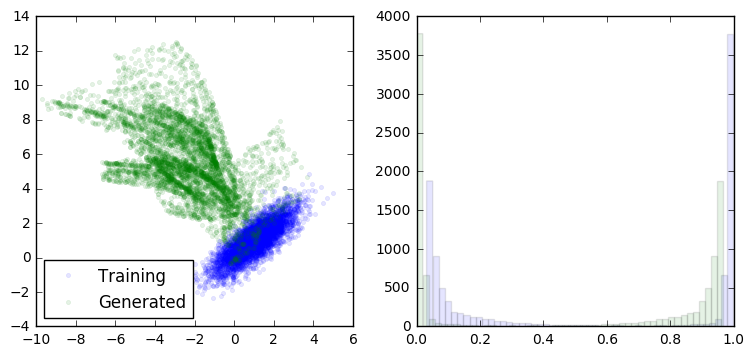

loss at step 9400: discriminative: 3.910670, generative: -22.490776


loss at step 9600: discriminative: 3.556851, generative: -22.648331


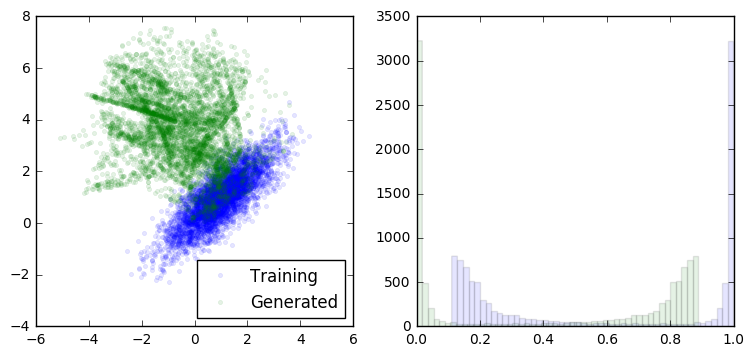

loss at step 9800: discriminative: 3.927261, generative: -23.521116


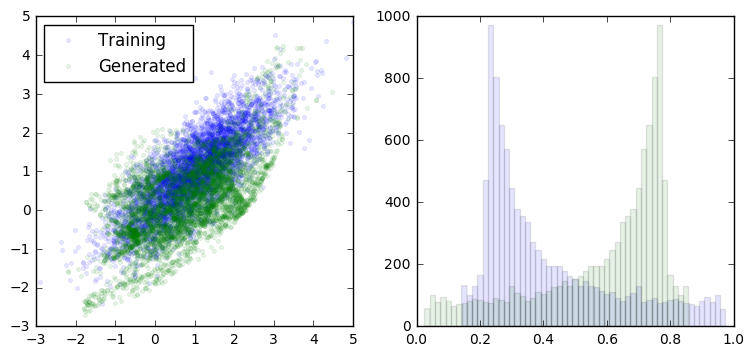

loss at step 10000: discriminative: 3.812094, generative: -23.941528


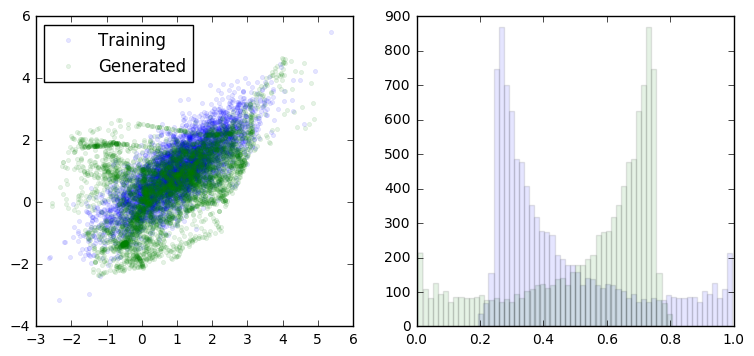

loss at step 10200: discriminative: 3.708670, generative: -24.366056


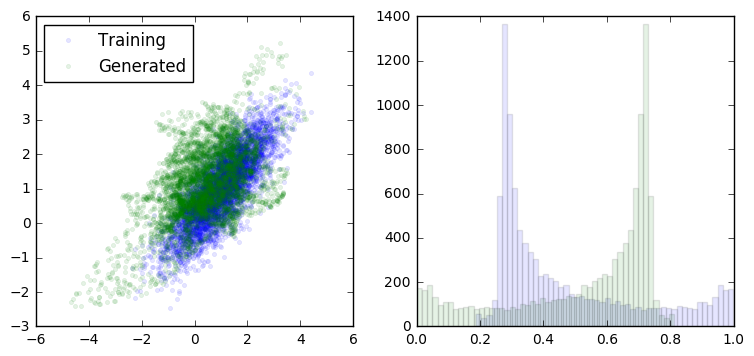

loss at step 10400: discriminative: 3.728730, generative: -24.918844


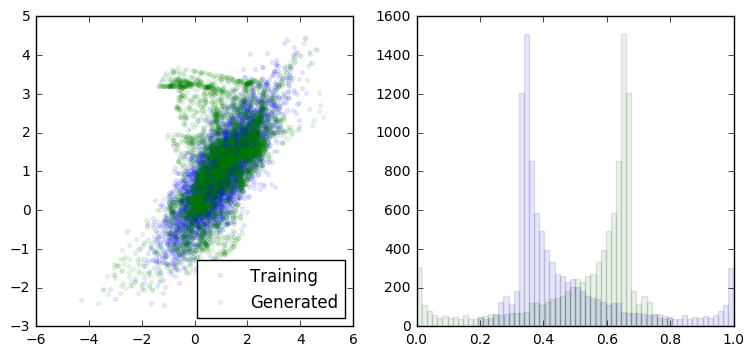

loss at step 10600: discriminative: 3.599401, generative: -25.339943


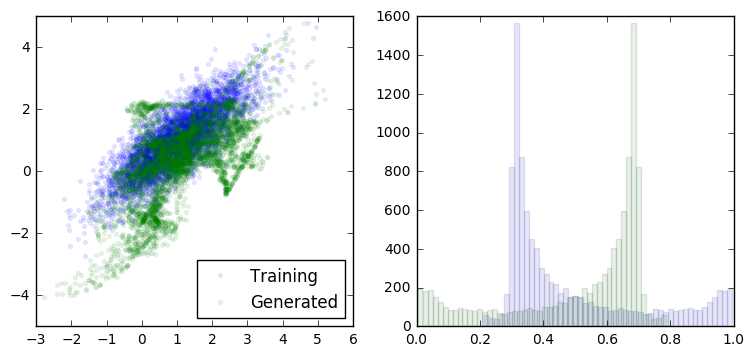

loss at step 10800: discriminative: 3.483119, generative: -25.774420


loss at step 11000: discriminative: 3.304534, generative: -26.153963


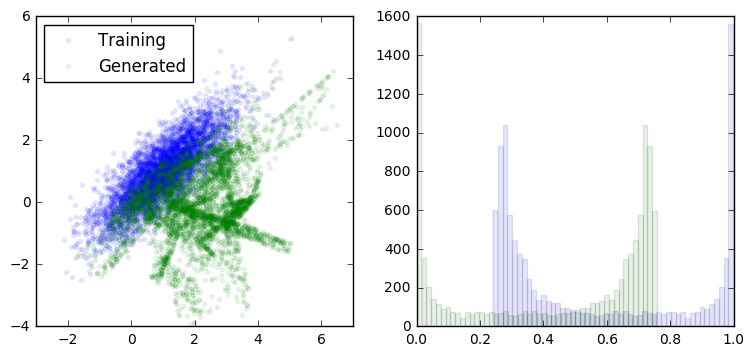

loss at step 11200: discriminative: 3.463043, generative: -26.888794


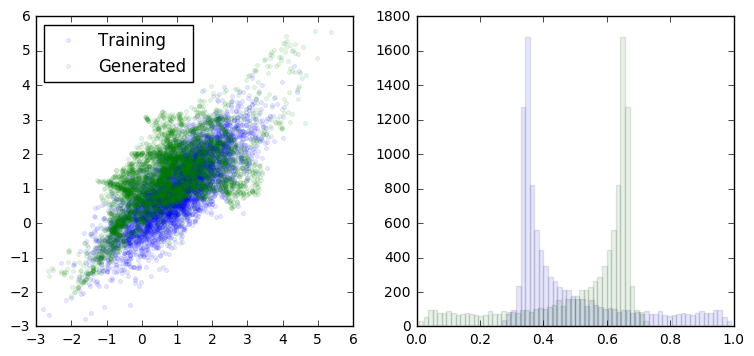

loss at step 11400: discriminative: 3.208635, generative: -27.194700


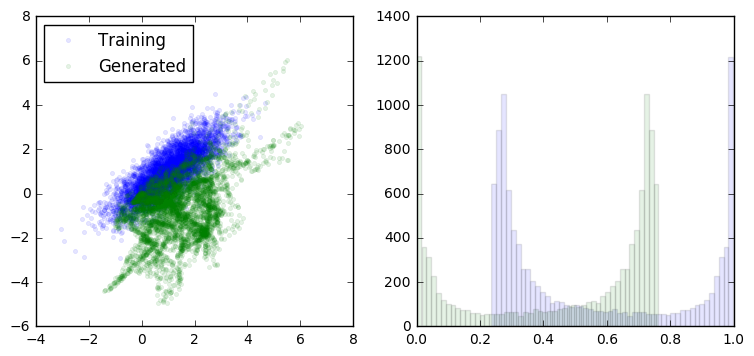

loss at step 11600: discriminative: 3.115385, generative: -27.687393


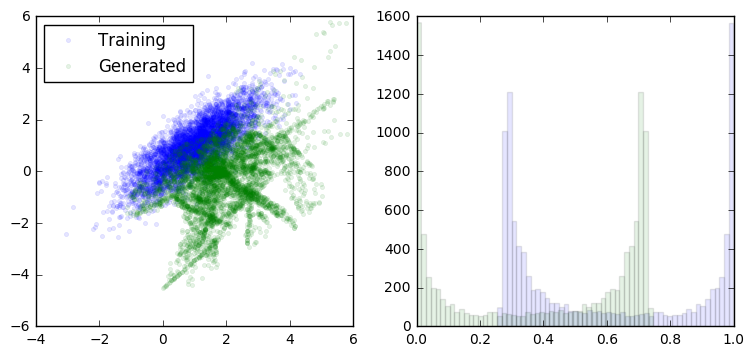

loss at step 11800: discriminative: 3.377369, generative: -28.574768


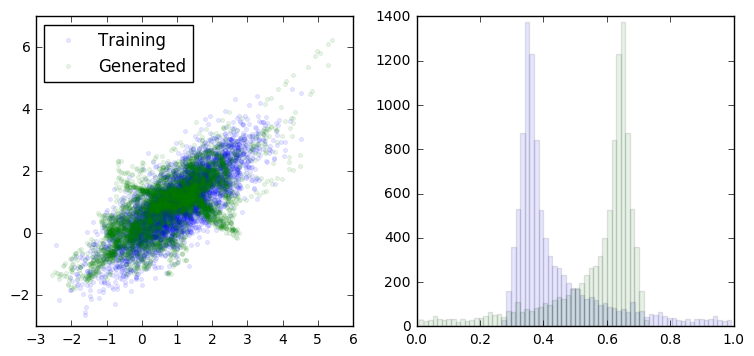

loss at step 12000: discriminative: 3.278152, generative: -29.082026


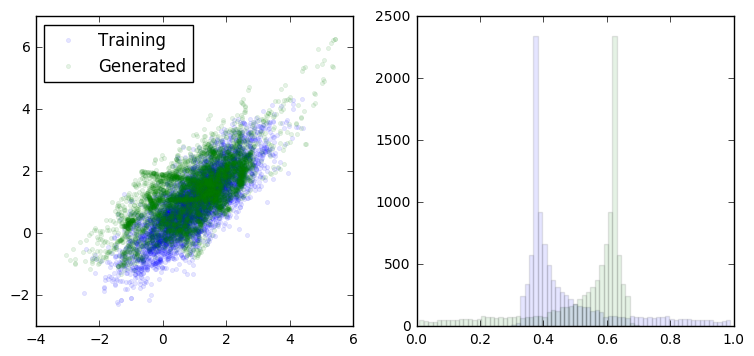

loss at step 12200: discriminative: 3.164684, generative: -29.577999


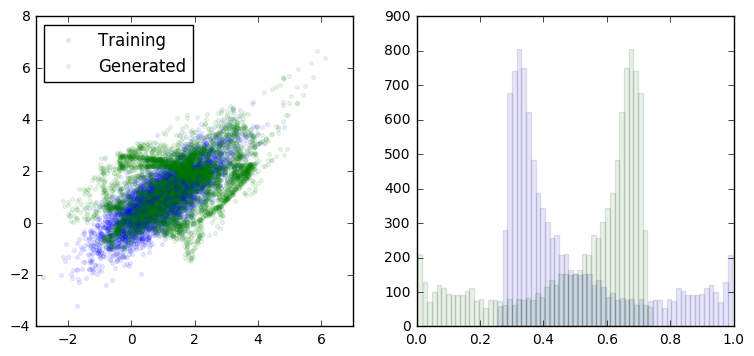

loss at step 12400: discriminative: 3.171528, generative: -30.228662


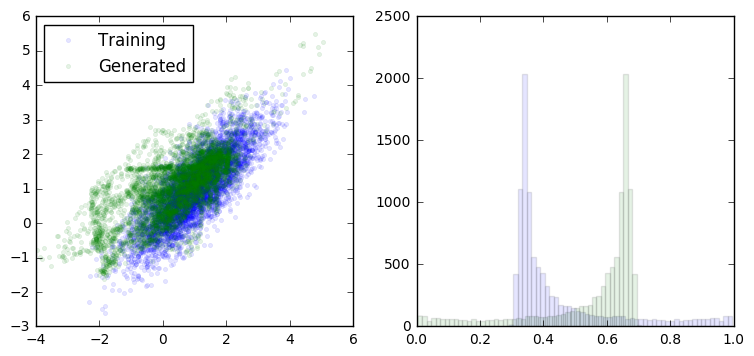

loss at step 12600: discriminative: 3.163758, generative: -30.860355


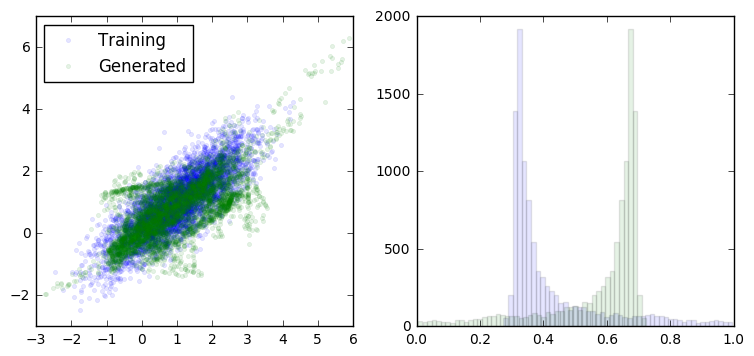

loss at step 12800: discriminative: 2.996345, generative: -31.354015


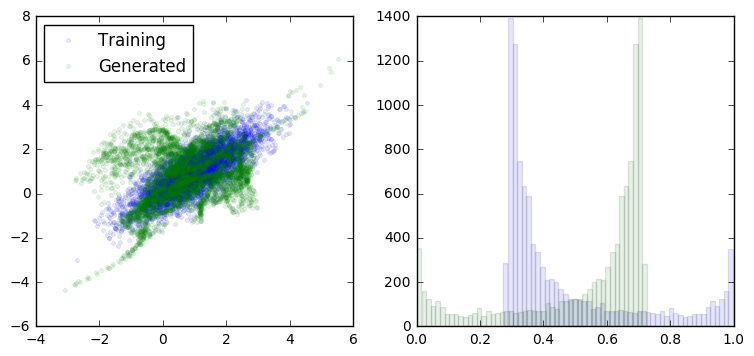

loss at step 13000: discriminative: 2.719779, generative: -31.714031


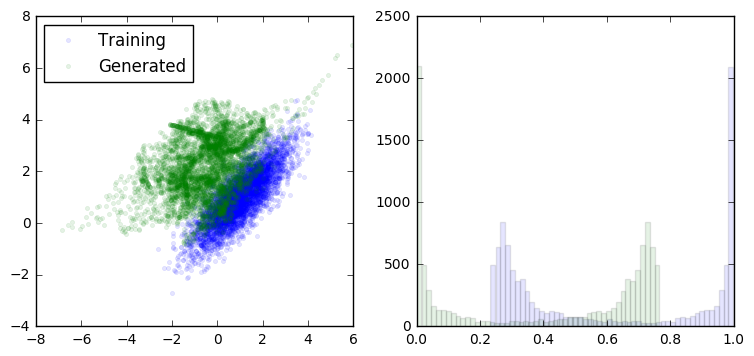

loss at step 13200: discriminative: 2.978102, generative: -32.664993


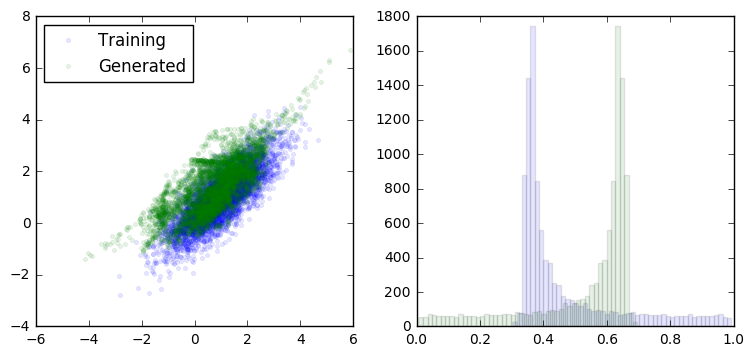

loss at step 13400: discriminative: 2.873963, generative: -33.257236


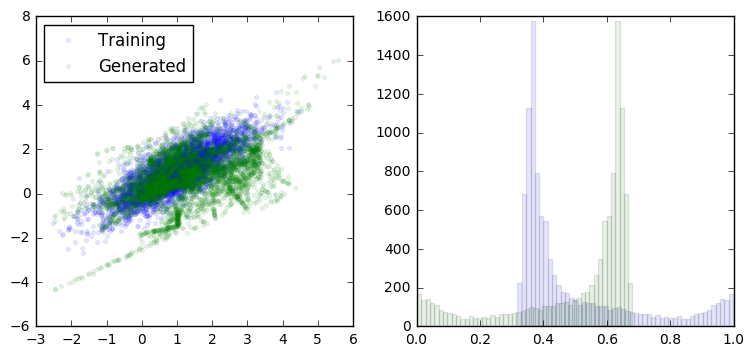

loss at step 13600: discriminative: 2.901803, generative: -33.975346


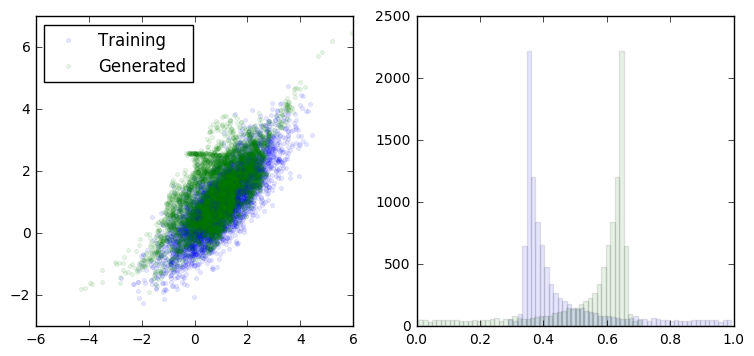

loss at step 13800: discriminative: 2.633569, generative: -34.403015


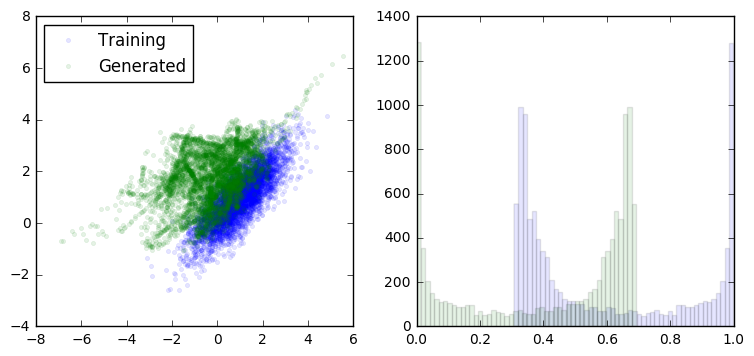

loss at step 14000: discriminative: 2.788162, generative: -35.303749


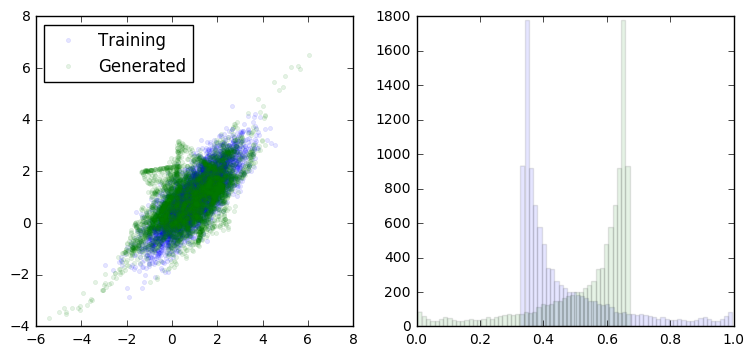

loss at step 14200: discriminative: 2.514949, generative: -35.739845


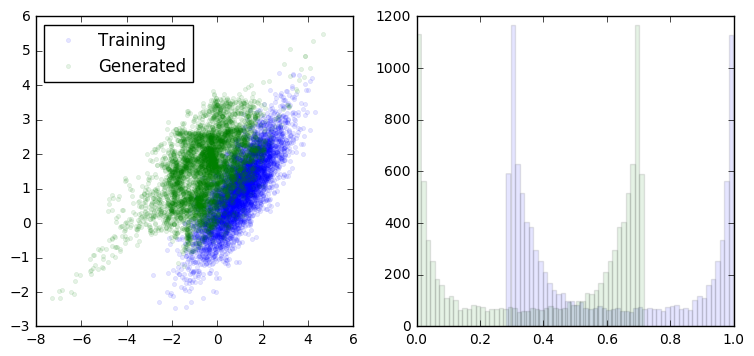

loss at step 14400: discriminative: 2.577550, generative: -36.580952


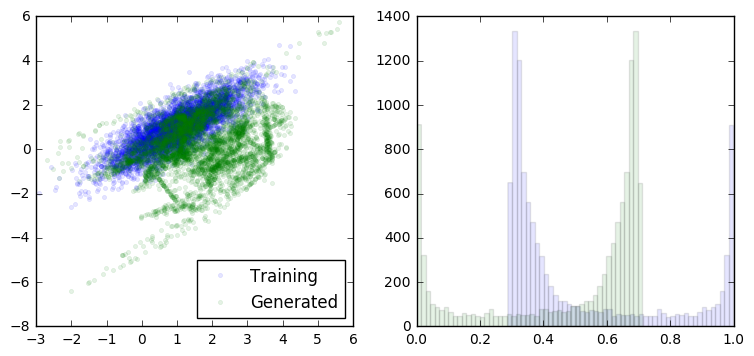

loss at step 14600: discriminative: 2.474513, generative: -37.230919


loss at step 14800: discriminative: 2.584555, generative: -38.128723


loss at step 15000: discriminative: 2.600382, generative: -38.927292


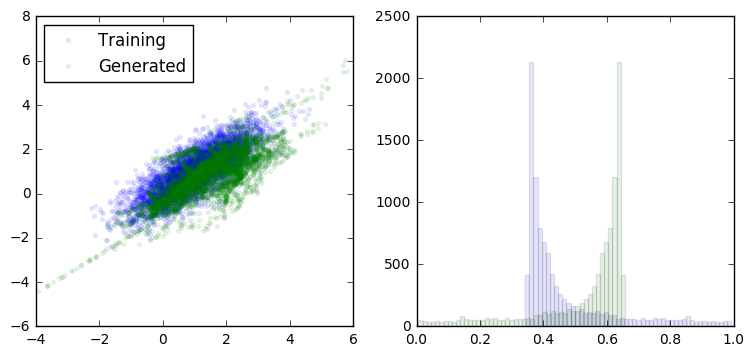

loss at step 15200: discriminative: 2.604744, generative: -39.738979


loss at step 15400: discriminative: 2.458998, generative: -40.420544


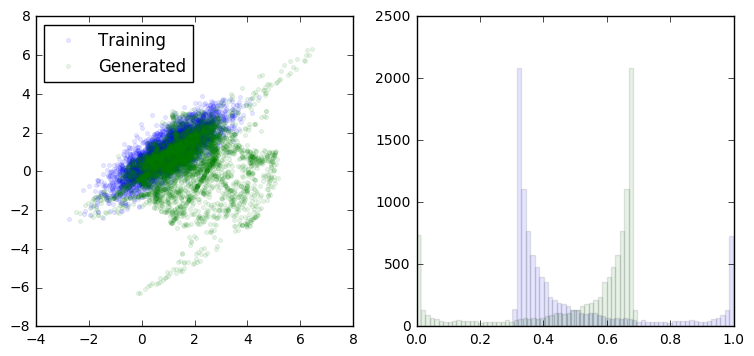

loss at step 15600: discriminative: 2.368346, generative: -41.156506


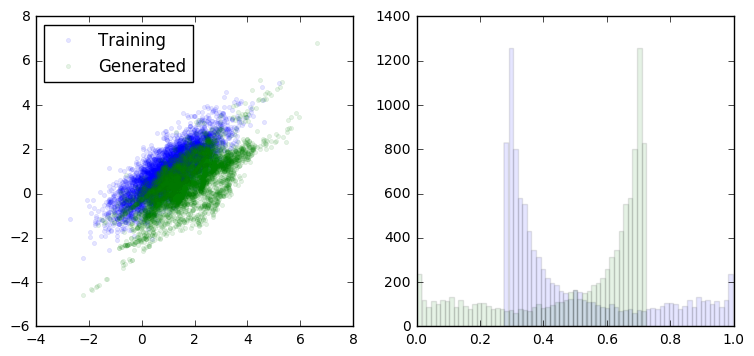

loss at step 15800: discriminative: 2.504316, generative: -42.146759


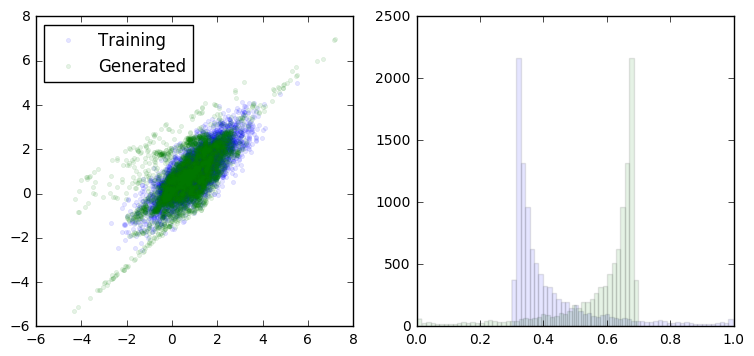

loss at step 16000: discriminative: 2.253222, generative: -42.768993


In [103]:
num_steps = 16001

n = 5000
batch_labels = np.zeros((n*2,2))
batch_labels[:n,0] = 1
batch_labels[n:,1] = 1


with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print("Initialized")
    for step in range(num_steps):
        rands = np.random.rand(n,2)
        training_batch = sim_real_data(n)
        
        feed_dict = {input_dataset : training_batch, labels : batch_labels, input_rands: rands}
        _, dl = session.run(
                [discriminative_optimizer, discriminative_loss], feed_dict=feed_dict)
        
        _, gl, gd, di,pr = session.run(
                [generative_optimizer, generative_loss, generated_data, discriminator_input,prediction], feed_dict=feed_dict)
        
        
        if (step % 200 == 0):
            print("loss at step %d: discriminative: %f, generative: %f" % (step, dl,gl))
            fig, ax = plt.subplots(1,2,figsize=(9,4))
            ax[0].plot(training_batch[:,0],training_batch[:,1],'.',alpha=0.1,label='Training')
            ax[0].plot(gd[:,0],gd[:,1],'.',alpha=0.1,label='Generated')
            ax[0].legend(loc=0,numpoints=1)
            
            ax[1].hist(pr[:,0],bins=50,alpha=0.1)
            ax[1].hist(pr[:,1],bins=50,alpha=0.1)
            plt.show()